# 회귀분석 과제
22 July 2021(Thu)

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 19기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [2]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [4]:
# train 데이터 불러오기
df = pd.read_csv("/content/gdrive/My Drive/graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [5]:
# test 데이터 불러오기
test = pd.read_csv("/content/gdrive/My Drive/graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [6]:
## TODO
nan_count0 = df.isnull().sum().to_frame('missing_num')
nan_count0

,missing_num
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
nan_count1 = test.isnull().sum().to_frame('missing_num')
nan_count1

,missing_num
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0


Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치는 없다. 위 표에서 모든 column에 결측치가 없다는 것이 확인되어 조치를 따로 취할 필요가 없었다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [8]:
## TODO
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

In [9]:
df['Research'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['Research'].replace({'No': 0, 'Yes' : 1}, inplace=True)
test['Research'].replace({'No': 0, 'Yes' : 1}, inplace=True)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,0,0.71
1,307,105,2,2.5,4.5,8.12,1,0.67
2,329,111,4,4.5,4.0,9.01,1,0.81
3,300,105,1,1.0,2.0,7.80,0,0.58
4,329,114,5,4.0,5.0,9.30,1,0.86
...,...,...,...,...,...,...,...,...
395,316,110,3,3.5,4.0,8.56,0,0.75
396,302,110,3,4.0,4.5,8.50,0,0.65
397,312,107,4,4.5,4.0,8.65,1,0.73
398,298,99,1,1.5,3.0,7.46,0,0.53


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. Research 변수가 범주형이고, 두가지 카테고리를 가지고 있었기 때문에 0과 1로 replace해주었다.

# 3. 선형(Linear) 회귀

In [11]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [12]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [13]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 7)
training response size: (320,)
test predictors size: (80, 7)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
model = LinearRegression()

# 2. 모델을 적합시킵니다.
## TODO
model.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % model.score(X_train, y_train))
print("Test R^2: %.2f" % model.score(X_test, y_test))

Training R^2: 0.83
Test R^2: 0.77


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO
y_pred = model.predict(X_test)
print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [18]:
## TODO
print("intercept:", model.intercept_)

intercept: -1.2551828664076383


Q. 절편 계수의 의미는 무엇인가요?  
A. 모든 독립변수가 0일때의 종속 변수의 값이다.

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [19]:
## TODO
beta = pd.DataFrame(model.coef_, index=X.columns, columns=["slope"])
beta.sort_values("slope")

,slope
GRE Score,0.001640
University Rating,0.002748
TOEFL Score,0.003606
SOP,0.007253
LOR,0.017343
Research,0.026481
CGPA,0.112079


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 독립변수가 변화할 때 합격확률의 수치에 얼만큼의 영향력을 행사하는지에 (독립변수의 변화량에 의한 합격확률의 변화량) 대한 수치이다. GRE score를 예로 들자면 이것이 1만큼 증가하면 합격확률이 대략적으로 0.001640만큼 증가할 수 있다고 해석이 가능하다. 유의미한 관계를 가지는 변인은 다른 변인들과 수치가 확연한 차이를 가진, 합격확률에 제일 큰 변화량을 가져오는 CGPA가 될 수 있을 듯 하다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

[]

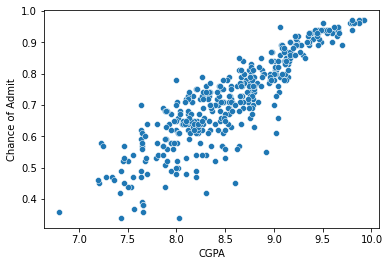

In [20]:
## TODO
sns.scatterplot(x='CGPA', y='Chance of Admit', data=df)
plt.plot()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

[]

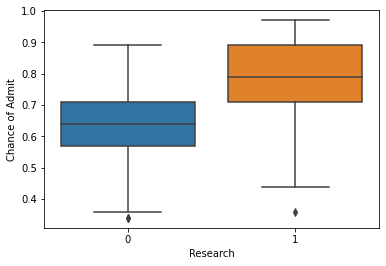

In [21]:
## TODO
sns.boxplot(x='Research', y='Chance of Admit', data=df)
plt.plot()
# Research: 0 = No, 1 = Yes

### 3.2. StatsModels로 선형 회귀 시행하기

In [22]:
import statsmodels.api as sm

In [23]:
## TODO
model2 = sm.OLS(y_train, X_train)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              5233.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):                   4.95e-320
Time:                        14:45:57   Log-Likelihood:                          408.55
No. Observations:                 320   AIC:                                     -803.1
Df Residuals:                     313   BIC:                                     -776.7
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0031      0.000     -7.047      0.000      -0.004      -0.002
TOEFL Score           0.0040      0.001      3.121      0.002       0.001       0.007
University Rating     0.0138      0.005      2.666      0.008       0.004       0.024
SOP                   0.0157      0.006      2.468      0.014       0.003       0.028
LOR                   0.0156      0.006      2.689      0.008       0.004       0.027
CGPA                  0.1282      0.014      9.414      0.000       0.101       0.155
Research              0.0566      0.009      6.475      0.000       0.039       0.074
==============================================================================
Omnibus:                       52.807   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.143
Skew:                          -0.993   Prob(JB):                     1.46e-18
Kurtosis:                       4.490   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. R^2의 값은 약 0.99으로 높은 값이므로 예측의 정확성에 힘을 실어주지만, F-static은 5233으로 높은 값이므로 선형에는 맞지 않은 분포이다. 즉 회귀 추정 신뢰도가 낮고 R^2가 매우 높게 나왔으므로 과적합을 예상할 수 있는 모델이다.
참고: https://twosb.github.io/2018/07/01/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98_F%20%EA%B2%80%EC%A0%95%20%ED%86%B5%EA%B3%84%EB%9F%89_%EA%B4%80%EA%B3%84/

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. 상관계수가 0.0138으로, 상대적으로 CGPA, SOP, LOR, Research보다 영향력이 작은 변인이라 해석할 수 있다. 또한 p-value가 0.008로 수치의 유의미함은 보장된다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [24]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
ridge = RidgeCV(alphas=(0.25, 0.5, 1, 2, 5))

# 2. 모델을 적합시킵니다.
## TODO
ridge.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % ridge.score(X_train, y_train))
print("Test R^2 Score : %.2f" % ridge.score(X_test, y_test))

Training R^2: 0.83
Test R^2 Score : 0.77


In [25]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
lasso = LassoCV(alphas=(0.25, 0.5, 1, 2, 5))

# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % lasso.score(X_train, y_train))
print("Test R^2 Score : %.2f" % lasso.score(X_test, y_test))

Training R^2: 0.64
Test R^2 Score : 0.56


test값 csv에 집어넣기

In [26]:
predict = pd.DataFrame(ridge.predict(test), columns=['Chance of Admit'])

In [27]:
predict.to_csv('graduate_submission.csv')